<a href="https://colab.research.google.com/github/esorq/Portfolio/blob/main/Binary_classifcation_for_breast_cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification on the The Breast Cancer Wisconsin (Diagnostic) DataSet 

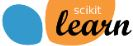
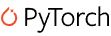
-----------
The purpose of this notebook is to take advantage of the PyTorch and sklearn libraries in order to solve a classifcation problem. 

The Breast Cancer Wisconsin (Diagnostic) Data Set is a classic and very easy binary classification dataset. It consists of 569 input samples with 30 features that belong to one out of two classes. The two classes of this dataset are *Benign*(not harmful) or *Malignant*(harmful). 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

-----------
Workflow for solving a classifaction problem of this nature:
1. Prepare and analyze data
2. Pick or build a model
3. Pick a loss function and optimizer
4. Build a training loop / Train the model
5. Evaluate the model
6. Propose changes / improve model

## 1. **Preparing**, **visualizing** and **analyzing** data

### 1.0 Loading the dataset

In [76]:
from sklearn.datasets import load_breast_cancer, load_diabetes, load_boston

#Creating a dataset object´and printing some general information
data = load_breast_cancer()

print(f"Number of samples: {len(data.target)}\nNumber of featuers = {len(data.feature_names)}\nFeatures names: {data.feature_names}\nTargets: {data.target_names}") 


Number of samples: 569
Number of featuers = 30
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets: ['malignant' 'benign']


In [77]:
import pandas as pd

# Visualizing the data in a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"]= data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [78]:
# Dividing the features and labels/targets into two separate variables and displaying the first sample 
X = data.data
y = data.target
X[0], y[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]), 0)

### 1.1 Scaling the data with `sklearn.preprocessing.StandardScaler`

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [79]:
# Using sklearn library to scale/transform/standardise the data around 0
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X[0], X_transformed[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]))

### 1.2 Splitting the dataset into training and testing data with `sklearn.model_selection.train_test_split`

In [80]:
# First turn data from numpy arrays into tensors since PyTorch models expect tensor inputs for training
import torch
X = torch.from_numpy(X_transformed).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [81]:
# Using sklearn library to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

## 2. **Choose** or **build** a model

In [82]:
import torch
from torch import nn

# Best practice from PyTorch team is is to write code in a device-agnostic manner. 
# This  means that in cases where more than one processing unit or devices are available(such as CPU, GPU or TPU in google colab) the operator defines onto which device objects are created.  
# Cross-GPU operations are not allowed by default, with the exception of copy_() and other methods with copy-like functionality such as to() and cuda().
# device is set to gpu("cuda") if it is available otherwise cpu. The device object will later be used to create/copy training data, models and other objects on the same device.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [83]:
input_shape = X_train.shape[1]        # number fo features in the input data sample
output_shape = len(data.target_names) # number of different classes
hidden_neurons = 5                    # number fo hidden neureons in the hidden layer

In [84]:
# Create a model class that subclasses the nn.Module as per PyTorch best practise
class RegressionModelV0(nn.Module):
    def __init__(self,input_shape, output_shape, hidden_neurons):
        super().__init__()
        # Create 2 nn.Linear layers and a ReLu layer 
        self.layer_1 = nn.Linear(in_features=input_shape, out_features=hidden_neurons) # takes input features (X), outputs hidden neurons
        self.layer_2 = nn.ReLU()
        self.layer_3 = nn.Linear(in_features=hidden_neurons, out_features=1) # takes in hidden neurons, outputs y_logits

    # Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_3 which is the predicted target label
        return self.layer_3(self.layer_2(self.layer_1(x))) # computation goes through layer_1 then layer_2 then layer_3.



In [85]:
# Create an object instance of the model and send it to target device
model_0 = RegressionModelV0(input_shape=input_shape, output_shape=output_shape, hidden_neurons=hidden_neurons).to(device)
model_0

RegressionModelV0(
  (layer_1): Linear(in_features=30, out_features=5, bias=True)
  (layer_2): ReLU()
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

## 3. **Choose** a loss function and optimizer
---------

In [86]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
#loss_fn = nn.L1Loss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01)# the learning rate(lr) is one important hyperparamter that control how big steps we take in every update. To small -> it can take forever to get to the loss minimum and to big -> we migth miss the loss minimum by taking to big of a step.

##4. **Build** a training looop
-----------

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
torch.manual_seed(42)# for reproducability

# Setting the number of epocs for training
epochs = 200

# Put data to same device as the model 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Store values for visualization
loss_viz = []
epoch_viz = []

# Build training loop
for epoch in range(epochs):
    #0. Set the model into .train() mode so that it tracks the gradients
    model_0.train() # setting the model into training mode

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions
    y_pred = torch.round(torch.sigmoid(y_logits)) # map logits to between 0 and 1 and then round them up or down to fit the target lables, this we do in order calculate the accuracy
  
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, 
                   y_train) 
    acc = accuracy_score(y_true=y_train.detach().numpy(), 
                      y_pred=y_pred.detach().numpy()) 

    loss_viz.append(loss.item())#.item() appends a python integer/float instead of a tensor
    epoch_viz.append(epoch)
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening every 10 epochs # % 20==0 -> if the epoch number is divided by 20 and the quotient has 0 digits after the decimal comma -> then print 
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc*100:.2f}%")

Epoch: 0 | Loss: 0.66687, Accuracy: 63.52%
Epoch: 20 | Loss: 0.62858, Accuracy: 67.03%
Epoch: 40 | Loss: 0.59487, Accuracy: 73.63%
Epoch: 60 | Loss: 0.56301, Accuracy: 79.12%
Epoch: 80 | Loss: 0.53248, Accuracy: 82.20%
Epoch: 100 | Loss: 0.50315, Accuracy: 83.08%
Epoch: 120 | Loss: 0.47547, Accuracy: 85.27%
Epoch: 140 | Loss: 0.44932, Accuracy: 86.59%
Epoch: 160 | Loss: 0.42447, Accuracy: 87.91%
Epoch: 180 | Loss: 0.40088, Accuracy: 88.57%


## 5. **Evaluate** the model
----------


The Model is evaluated by running the test dataset in `torch.inference_mode()`
results are presented with metrics from `sklearn.metrics` and visualized with a confusion matrix!

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [90]:
#Testing the test_dataset
model_0.eval()
with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze() 
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate loss
    test_loss = loss_fn(test_logits,
                        y_test)


Test loss: 0.36670079827308655
Test Accuracy: 0.9473684210526315
Precision:0.922077922077922 
Recall: 1.0
F1 Score: 0.9594594594594594
Confusion Matrix:


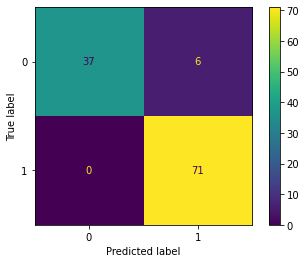

In [91]:
#Print metrics and confusion matrix
c_matrix = confusion_matrix(y_test, test_pred)

ConfusionMatrixDisplay(c_matrix).plot()
print(f"Test loss: {test_loss}\nTest Accuracy: {accuracy_score(y_test, test_pred)}\nPrecision:{precision_score(y_test, test_pred)} \nRecall: {recall_score(y_test, test_pred)}\nF1 Score: {f1_score(y_test, test_pred)}\nConfusion Matrix:")

In [92]:
from matplotlib import pyplot as plt

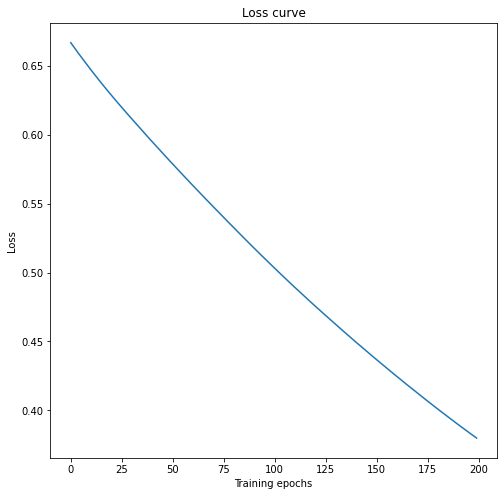

In [93]:
#Plotting the loss as a function of training epochs
plt.figure(figsize=(8,8))
plt.plot(epoch_viz, loss_viz)
plt.title("Loss curve")
plt.xlabel("Training epochs")
plt.ylabel("Loss")
plt.show()


## 6. **Propose** changes / **improve** model
-----------

Hyperparamters that comes to mind that can be adjusted in a project like this and possibly improve performance:

* Layer architecture
  * number of layers 
  * number of neurons per layer
  * kind of layers 
  * activation functions.
* Training epochs
  *Adjust the amount
* Loss function
* Optimizer
  * learning rate
  * momentum
* The Scaling approach of initial data
